In [13]:
import pandas as pd
from pandas import Series,DataFrame
rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table(r'ratings.dat',sep ="::",header = None,names = rnames)
ratings[:3]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [14]:
data = ratings.pivot(index = 'user_id',columns = 'movie_id',values = 'rating')
data[:5]

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.loc[4169].corr(data.loc[424])

0.45663851303413394

In [16]:
test = data.reindex([424,4169],columns = data.loc[4169][data.loc[424].notnull()].dropna().index)
test

movie_id,2,6,10,11,12,17,21,22,25,32,...,3919,3925,3927,3928,3930,3932,3933,3935,3948,3949
user_id,,,,,,,,,,,,,,,,,,,,,
424,4.0,4.0,4.0,4.0,1.0,5.0,3.0,3.0,4.0,5.0,...,2.0,4.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,5.0
4169,3.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,5.0,4.0,...,3.0,1.0,5.0,5.0,2.0,5.0,3.0,4.0,4.0,5.0


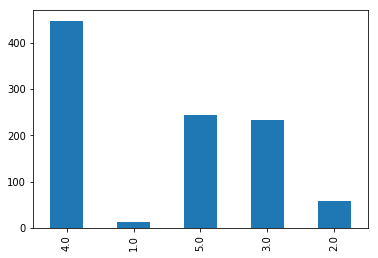

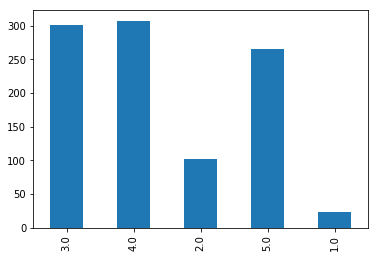

In [17]:
import matplotlib.pyplot as plt
test.loc[424].value_counts(sort = False).plot(kind = 'bar')
plt.show()
test.loc[4169].value_counts(sort = False).plot(kind = 'bar')
plt.show()

In [22]:
import numpy as np
periods_test = DataFrame(np.zeros((20,7)),columns = [10,20,50,100,200,500,998])
for i in periods_test.index:
    for j in periods_test.columns:
        sample = test.reindex(columns = np.random.permutation(test.columns)[:j])
        periods_test.loc[i,j] = sample.iloc[0].corr(sample.iloc[1])
periods_test[:5]

,10,20,50,100,200,500,998
0,-0.174964,0.431788,0.385708,0.483484,0.418801,0.407760,0.456639
1,0.791050,0.340466,0.501077,0.507143,0.510871,0.453844,0.456639
2,0.773249,0.645602,0.075965,0.501053,0.401912,0.447005,0.456639
3,0.871849,0.313451,0.559276,0.510759,0.453214,0.445574,0.456639
4,0.000000,0.201307,0.283331,0.548132,0.439836,0.442207,0.456639


In [23]:
periods_test.describe()

,10,20,50,100,200,500,998
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,0.492006,0.455651,0.422039,0.437492,0.461590,0.453529,4.566385e-01
std,0.337889,0.169551,0.129472,0.104439,0.043442,0.024075,1.254265e-16
min,-0.185695,0.155799,0.075965,0.134545,0.378584,0.407439,4.566385e-01
25%,0.277326,0.337269,0.364161,0.398133,0.423908,0.443736,4.566385e-01
50%,0.565781,0.468310,0.445524,0.482265,0.466488,0.451985,4.566385e-01
75%,0.775545,0.574091,0.525888,0.507633,0.496440,0.471365,4.566385e-01
max,0.871849,0.754476,0.559276,0.548132,0.534602,0.492225,4.566385e-01


In [25]:
check_size = 1000
check = {}
check_data = data.copy()#复制一份data用于检验，以免篡改原数据
check_data = check_data.loc[check_data.count(axis=1)>200]#滤除评价数小于200的用户
for user in np.random.permutation(check_data.index):
    movie = np.random.permutation(check_data.loc[user].dropna().index)[0]
    check[(user,movie)] = check_data.loc[user,movie]
    check_data.loc[user,movie] = np.nan
    check_size -=1
    if not check_size:
        break
corr = check_data.T.corr(min_periods = 200)
corr_clean = corr.dropna(how = 'all')
corr_clean = corr_clean.dropna(axis=1,how='all')#删除全空的行和列
check_ser = Series(check)#这是被提取出来的1000个真实评分
check_ser[:5]


19  594     3.0
22  47      4.0
23  1060    1.0
33  1302    2.0
36  1374    4.0
dtype: float64

In [28]:
result = Series(np.nan,index = check_ser.index)
for user,movie in result.index:
    prediction = []
    if user in corr_clean.index:
        corr_set = corr_clean[user][corr_clean[user]>0.1].dropna()#仅限大于0.1的用户
    else:continue
    for other in corr_set.index:
        if not np.isnan(data.loc[other,movie]) and other != user:#注意bool(np.nan)==True
            prediction.append((data.loc[other,movie],corr_set[other]))
    if prediction:
        result[(user,movie)] = sum([value*weight for value,weight in prediction])/sum([pair[1] for pair in prediction])

result.dropna(inplace=True)
len(result)#随机抽取的1000个用户中也有被min_periods=200刷掉的

841

In [29]:
result[:5]

19  594     4.284566
22  47      4.307536
23  1060    3.987706
33  1302    3.929813
36  1374    3.885951
dtype: float64

In [30]:
result

19    594     4.284566
22    47      4.307536
23    1060    3.987706
33    1302    3.929813
36    1374    3.885951
42    923     4.776990
45    118     2.030570
53    1911    2.657035
58    2644    3.867612
59    590     5.000000
62    1212    4.477118
73    2320    3.110649
117   1217    4.173173
118   3639    2.954199
131   2616    2.919358
136   898     4.432180
148   1042    3.359878
149   3893    3.525719
150   3359    4.663384
151   3949    4.249323
157   209     2.128316
161   1307    4.040359
169   204     2.550620
173   1694    3.859561
175   441     3.914538
181   2403    3.658102
187   753     3.230233
192   2012    3.104989
195   829     2.288732
198   2355    3.984487
                ...   
5795  1597    3.174628
5811  926     4.659322
5824  3398    3.399651
5826  2022    4.000000
5831  2470    3.342601
5837  3433    2.099155
5838  2973    5.000000
5841  2111    3.320384
5854  47      4.244304
5874  3909    2.745211
5878  3044    3.840962
5888  762     2.003526
5917  2553 

In [31]:
result.corr(check_ser.reindex(result.index))

0.44572679501235124

In [32]:
(result-check_ser.reindex(result.index)).abs().describe()#推荐期望与实际评价之差的绝对值

count    841.000000
mean       0.775047
std        0.608934
min        0.000000
25%        0.282152
50%        0.674304
75%        1.102540
max        4.000000
dtype: float64

In [35]:
corr = data.T.corr(min_periods = 200)
corr_clean = corr.dropna(how = 'all')
corr_clean = corr_clean.dropna(axis = 1,how = 'all')
lucky = np.random.permutation(corr_clean.index)[0]
gift = data.loc[lucky]
gift = gift[gift.isnull()]#现在gift是一个全空的序列
corr_lucky = corr_clean[lucky].drop(lucky)
corr_lucky = corr_lucky[corr_lucky>0.1].dropna()
for movie in gift.index:
    prediction = []
    for other in corr_lucky.index:
        if not np.isnan(data.loc[other,movie]):
            prediction.append((data.loc[other,movie],corr_clean[lucky][other]))
    if prediction:
        gift[movie] = sum([value*weight for value,weight in prediction])/sum([pair[1]] for pair in prediction)

gift.dropna().order(asending = False)
movie_id

TypeError: unsupported operand type(s) for +: 'int' and 'list'